<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#构建逻辑回归分类器" data-toc-modified-id="构建逻辑回归分类器-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>构建逻辑回归分类器</a></span></li><li><span><a href="#模型评估指标" data-toc-modified-id="模型评估指标-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>模型评估指标</a></span></li><li><span><a href="#对信用卡违约率进行分析" data-toc-modified-id="对信用卡违约率进行分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>对信用卡违约率进行分析</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>总结</a></span></li><li><span><a href="#练习" data-toc-modified-id="练习-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>练习</a></span></li></ul></div>

1. 了解逻辑回归类，以及如何在 sklearn 中使用它；
1. 信用卡欺诈属于二分类问题，欺诈交易在所有交易中的比例很小，对于这种数据不平衡的情况，到底采用什么样的模型评估标准会更准确；
1. 完成信用卡欺诈分析的实战项目，并通过数据可视化对数据探索和模型结果评估进一步加强了解。

## 构建逻辑回归分类器

logistic 回归，主要解决的是**二分类问题**。

Sigmoid 函数：<img src="https://static001.geekbang.org/resource/image/3e/18/3e7c7cb4d26d1a71f958610f26d20818.png" style="width:200px"><br><br>
<br>
Sigmoid 函数的图形如下所示：<img src="https://static001.geekbang.org/resource/image/b7/3b/b7a5d39d91fda02b21669137a489743b.png" style="width:500px">

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty=l1, solver='liblinear', max_iter=10, n_jobs=1)

penalty：惩罚项，取值为 l1 或 l2。
    - l1：拉普拉斯分布；
    - l2：高斯分布。

solver：逻辑回归损失函数的优化方法。
    - liblinear：默认值
    - lbfgs：
    - newton-cg：
    - sag：适用于数据量大的数据集
    - saga：适用于数据量大的数据集

max_iter：算法收敛的最大迭代次数，默认是 10。

n_jobs：拟合和预测时 CPU 的核数，默认是 1，也可以是其他整数。如果是 -1，则代表 CPU 的核数。

## 模型评估指标

准确率（accuracy）在分类结果严重不平衡时，很难反应模型好坏。


新的指标 F1：<img src="https://static001.geekbang.org/resource/image/b1/ce/b122244eae9a74eded619d14c0bc12ce.png" style="width:200px"><br>
其中，P 是精确率，R 是召回率。数值越大，代表模型结果越好。

<img src="https://i.loli.net/2019/11/22/AWxYXE7yvkIDrj1.png" style="width:200px">

Accuracy = （TP+TN）/（TP+TN+FN+FP）

P = TP/（TP+FP）

R = TP/（TP+FN）

## 对信用卡违约率进行分析

项目流程：<img src="https://static001.geekbang.org/resource/image/92/a5/929c96584cbc25972f63ef39101c96a5.jpg" style="width:500px">

1. 用数据可视化的方式探索数据：分类结果的情况、随时间变化欺诈交易和正常交易的分布情况；<br><br>
1. V1-V28 的特征值已经 PCA 变换过，Time 字段与是否是欺诈交易无关，因此不作为特征值，因此只需对 Amount 做数据规范化；<br><br>
1. 使用 train_test_spilt 对数据集进行划分；<br><br>
1. 创建逻辑回归分类器；<br><br>
1. 传入训练数据集进行训练；<br><br>
1. 传入测试及预测结果，将预测结果与测试集的结果进行比对，模型评估模型包括精确率、召回率和 F1 值；<br><br>
1. 可视化精确率 - 召回率。

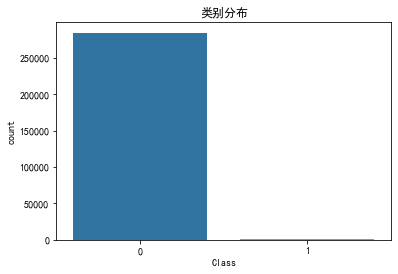

总交易数： 284807
总诈骗交易笔数： 492
诈骗交易比例：578.876016


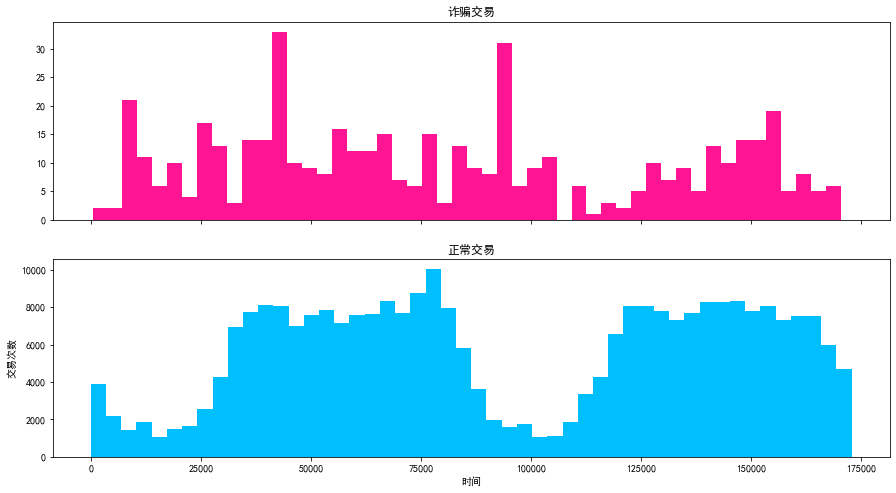

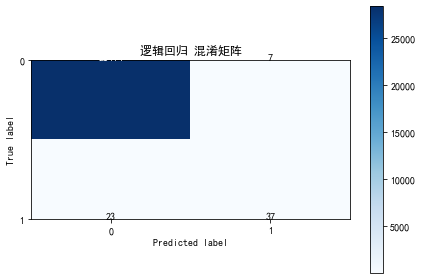

精确率：0.841
召回率：0.617
F1 值：0.712


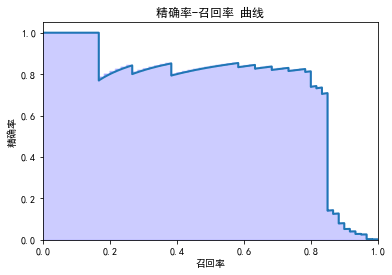

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix"', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def show_metrics():
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tn = cm[0, 0]
    P = tp/(tp+fp)
    R = tp/(tp+fn)
    F1 = 2 * P * R / (P + R)

    print('精确率：{:.3f}'.format(P))
    print('召回率：{:.3f}'.format(R))
    print('F1 值：{:.3f}'.format(F1))


def plot_precision_recall():
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show()


data = pd.read_csv('./datasets/creditcard.csv')

# print(data.describe())

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure()
ax = sns.countplot(x='Class', data=data)
plt.title('类别分布')
plt.show()

num = len(data)
num_fraud = len(data[data['Class'] == 1])
print("总交易数：", num)
print("总诈骗交易笔数：", num_fraud)
print("诈骗交易比例：{:.6f}".format(num/num_fraud))

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins=bins, color='deeppink')
ax1.set_title("诈骗交易")
ax2.hist(data.Time[data.Class == 0], bins=bins, color='deepskyblue')
ax2.set_title("正常交易")
plt.xlabel("时间")
plt.ylabel("交易次数")
plt.show()

data['Amount_Norm'] = StandardScaler().fit_transform(
    data['Amount'].values.reshape(-1, 1))

y = np.array(data.Class.tolist())
data = data.drop(['Time', 'Amount', 'Class'], axis=1)
X = np.array(data.as_matrix())

train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.1, random_state=33)

clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

score_y = clf.decision_function(test_x)

cm = confusion_matrix(test_y, predict_y)
class_names = [0, 1]

plot_confusion_matrix(cm, classes=class_names, title='逻辑回归 混淆矩阵')
show_metrics()

precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()

通过可视化可知，当精确率高时，召回率往往很低；召回率高时，精确率会比较低。

**说明**

混淆矩阵：误差矩阵，实际上就是 TP、FP、TN、FN 四个数值的矩阵表示，用来帮助我们判断预测值和实际值相比，对了多少。通过上图可知，TP=37，FP=7，FN=23。

precision_recall_curve 函数，通过预测值和真实值来计算精确率 - 召回率曲线。precision_recall_curve 函数会计算在不同概率阈值情况下的精确率和召回率。

## 总结

![](https://static001.geekbang.org/resource/image/ab/50/abee1a58b99814f1e0218778b98a6950.png)

## 练习
1. 还有哪些数据属于不平衡数据？
1. 使用线性 SVM （对应 sklearn 中的 LinearSVC）对信用卡欺诈数据集进行分类。